In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np

In [2]:
path = '/Users/yahya/Downloads/reviews.csv'
data = pd.read_csv(path)

In [3]:
data

,S,UserName,Rating,Subject,ReviewDate,Review
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...
...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...


In [4]:
x = data['Rating'].str.split(' out of 5 stars', expand=True)

In [5]:
data['rating'] = x[0]

In [6]:
data

,S,UserName,Rating,Subject,ReviewDate,Review,rating
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0
...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0


In [7]:
data['rating'].describe()

count     618
unique      5
top       5.0
freq      343
Name: rating, dtype: object

In [8]:
fig = px.histogram(data, x="rating", title="Histogram of Schmidt's Ratings in Amazon Reviews",
                  labels={
                      "count": "Count",
                      "rating": "Review Rating Out of 5",
                      
                  })


In [9]:
fig.show()

In [10]:
data

,S,UserName,Rating,Subject,ReviewDate,Review,rating
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0
...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0


In [11]:
data['subject_review'] = data['Subject'] + data['Review']

In [12]:
data


,S,UserName,Rating,Subject,ReviewDate,Review,rating,subject_review
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0,GAVE ME AN ARMPIT LUMP lolI love the idea of n...
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0,Best natural deodorant that I have tried.This ...
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0,I'm just disappointed I can't find a natural d...
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0,Bad batch!!!I odered a bulk batch of Charcoal ...
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0,Great Deodorant but STAINSbought this a couple...
...,...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0,Works greatWorks great for my husband. No sore...
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0,BEWARE OF REACTIONS TO USAGEPurchased at Costc...
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0,"Great Smell, and WorksI love the smell of this..."
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0,IT works so I put up with treating stainsI lov...


In [15]:
nlp = spacy.load('en')

In [16]:
data

,S,UserName,Rating,Subject,ReviewDate,Review,rating,subject_review
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0,GAVE ME AN ARMPIT LUMP lolI love the idea of n...
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0,Best natural deodorant that I have tried.This ...
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0,I'm just disappointed I can't find a natural d...
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0,Bad batch!!!I odered a bulk batch of Charcoal ...
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0,Great Deodorant but STAINSbought this a couple...
...,...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0,Works greatWorks great for my husband. No sore...
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0,BEWARE OF REACTIONS TO USAGEPurchased at Costc...
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0,"Great Smell, and WorksI love the smell of this..."
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0,IT works so I put up with treating stainsI lov...


In [17]:
nlp

In [18]:
data['subject_review_lemme'] = data['subject_review'].apply(nlp)

In [19]:
from spacy.lang.en.stop_words import STOP_WORDS

In [20]:
stopwords = STOP_WORDS

In [22]:
data

,S,UserName,Rating,Subject,ReviewDate,Review,rating,subject_review,subject_review_lemme
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0,GAVE ME AN ARMPIT LUMP lolI love the idea of n...,"(GAVE, ME, AN, ARMPIT, LUMP, lolI, love, the, ..."
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0,Best natural deodorant that I have tried.This ...,"(Best, natural, deodorant, that, I, have, trie..."
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0,I'm just disappointed I can't find a natural d...,"(I, 'm, just, disappointed, I, ca, n't, find, ..."
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0,Bad batch!!!I odered a bulk batch of Charcoal ...,"(Bad, batch!!!I, odered, a, bulk, batch, of, C..."
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0,Great Deodorant but STAINSbought this a couple...,"(Great, Deodorant, but, STAINSbought, this, a,..."
...,...,...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0,Works greatWorks great for my husband. No sore...,"(Works, greatWorks, great, for, my, husband, ...."
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0,BEWARE OF REACTIONS TO USAGEPurchased at Costc...,"(BEWARE, OF, REACTIONS, TO, USAGEPurchased, at..."
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0,"Great Smell, and WorksI love the smell of this...","(Great, Smell, ,, and, WorksI, love, the, smel..."
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0,IT works so I put up with treating stainsI lov...,"(IT, works, so, I, put, up, with, treating, st..."


In [23]:
# data['subject_review_lemme_str'] = data['subject_review_lemme'].apply(nlp)

In [24]:
textt = ''.join(review for review in data.subject_review)
stopwords.update(['deodorant', 'product', "I'm", "armpit"])

In [25]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(textt)

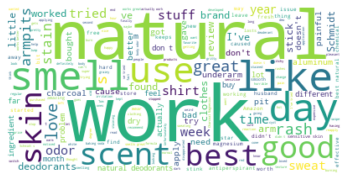

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')

In [27]:
wordcloud.to_file('word.png')

In [28]:
df = data[data['rating'] !=3]

In [29]:
df


,S,UserName,Rating,Subject,ReviewDate,Review,rating,subject_review,subject_review_lemme
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0,GAVE ME AN ARMPIT LUMP lolI love the idea of n...,"(GAVE, ME, AN, ARMPIT, LUMP, lolI, love, the, ..."
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0,Best natural deodorant that I have tried.This ...,"(Best, natural, deodorant, that, I, have, trie..."
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0,I'm just disappointed I can't find a natural d...,"(I, 'm, just, disappointed, I, ca, n't, find, ..."
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0,Bad batch!!!I odered a bulk batch of Charcoal ...,"(Bad, batch!!!I, odered, a, bulk, batch, of, C..."
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0,Great Deodorant but STAINSbought this a couple...,"(Great, Deodorant, but, STAINSbought, this, a,..."
...,...,...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0,Works greatWorks great for my husband. No sore...,"(Works, greatWorks, great, for, my, husband, ...."
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0,BEWARE OF REACTIONS TO USAGEPurchased at Costc...,"(BEWARE, OF, REACTIONS, TO, USAGEPurchased, at..."
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0,"Great Smell, and WorksI love the smell of this...","(Great, Smell, ,, and, WorksI, love, the, smel..."
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0,IT works so I put up with treating stainsI lov...,"(IT, works, so, I, put, up, with, treating, st..."


In [41]:
df['rating'] = pd.to_numeric(df['rating'])

In [42]:
df['sentiment'] = df['rating'].apply(lambda rating: +1.0 if rating > 3.0 else -1.0)

In [43]:
df

,S,UserName,Rating,Subject,ReviewDate,Review,rating,subject_review,subject_review_lemme,sentiment
0,B0767KYP92,rachel staman,1.0 out of 5 stars,GAVE ME AN ARMPIT LUMP lol,"Reviewed in the United States on May 2, 2018",I love the idea of natural deodorant and every...,1.0,GAVE ME AN ARMPIT LUMP lolI love the idea of n...,"(GAVE, ME, AN, ARMPIT, LUMP, lolI, love, the, ...",-1.0
1,B0767KYP92,Grammy,5.0 out of 5 stars,Best natural deodorant that I have tried.,"Reviewed in the United States on February 20, ...",This is by far the best natural deodorant that...,5.0,Best natural deodorant that I have tried.This ...,"(Best, natural, deodorant, that, I, have, trie...",1.0
2,B0767KYP92,Clarissa Wilson,1.0 out of 5 stars,I'm just disappointed I can't find a natural d...,"Reviewed in the United States on July 16, 2018",I've tried quite a few of the natural deodoran...,1.0,I'm just disappointed I can't find a natural d...,"(I, 'm, just, disappointed, I, ca, n't, find, ...",-1.0
3,B0767KYP92,YTrevino,1.0 out of 5 stars,Bad batch!!!,"Reviewed in the United States on April 22, 2018",I odered a bulk batch of Charcoal and Magnesiu...,1.0,Bad batch!!!I odered a bulk batch of Charcoal ...,"(Bad, batch!!!I, odered, a, bulk, batch, of, C...",-1.0
4,B0767KYP92,GenuineImitation,1.0 out of 5 stars,Great Deodorant but STAINS,"Reviewed in the United States on May 14, 2018",bought this a couple of times.. really a good ...,1.0,Great Deodorant but STAINSbought this a couple...,"(Great, Deodorant, but, STAINSbought, this, a,...",-1.0
...,...,...,...,...,...,...,...,...,...,...
613,B0767KYP92,Lyndz,5.0 out of 5 stars,Works great,"Reviewed in the United States on May 5, 2018",Works great for my husband. No sores or rashes...,5.0,Works greatWorks great for my husband. No sore...,"(Works, greatWorks, great, for, my, husband, ....",1.0
614,B0767KYP92,GB Wizzard,1.0 out of 5 stars,BEWARE OF REACTIONS TO USAGE,"Reviewed in the United States on March 17, 2019",Purchased at Costco when they promoted the pro...,1.0,BEWARE OF REACTIONS TO USAGEPurchased at Costc...,"(BEWARE, OF, REACTIONS, TO, USAGEPurchased, at...",-1.0
615,B0767KYP92,Grace,5.0 out of 5 stars,"Great Smell, and Works","Reviewed in the United States on September 5, ...",I love the smell of this deodorant! It smells ...,5.0,"Great Smell, and WorksI love the smell of this...","(Great, Smell, ,, and, WorksI, love, the, smel...",1.0
616,B0767KYP92,Tamra Kjormoe,4.0 out of 5 stars,IT works so I put up with treating stains,"Reviewed in the United States on January 27, 2019",I love this. It si the only thing that works ...,4.0,IT works so I put up with treating stainsI lov...,"(IT, works, so, I, put, up, with, treating, st...",1.0


In [44]:
positive = df[df['sentiment'] == 1]

In [45]:
negative = df[df['sentiment'] == -1]

In [53]:
pos = ' '.join(review for review in positive.subject_review)

In [55]:
pos

'Best natural deodorant that I have tried.This is by far the best natural deodorant that I have tried.  I realize that different people will have different circumstances, different organic structures, but for me, this deodorant has worked great. To address some of the issues that I have seen other people make:  yes, it will stain light colored clothes because it has charcoal in it.  However, it works so well to eliminate odor and wetness, that I have just taken to wearing darker colored shirts.  On those light color ones that do get stains, I just pretreat with a stain remover, wash, and stain is gone.  Another negative that I have seen in the reviews is that some of the dispensers don\'t work.  What I have found (and I have had a few that didn\'t initially work) is that if you will gently warm the dispenser it softens up the product and the dispenser will then go up and down just like it should.  As to the texture of the deodorant.....yes it is a bit grainy, but not uncomfortably so. 

In [58]:
wordcloudpos = WordCloud(stopwords=stopwords, background_color='white').generate(pos)

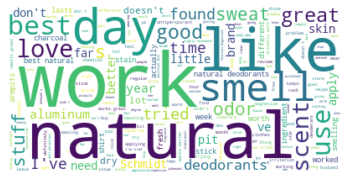

In [61]:
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudpositive.png')

In [69]:
neg = ' '.join(review for review in negative.subject_review)

In [73]:
wordcloudneg = WordCloud(stopwords=stopwords, background_color='white').generate(neg)

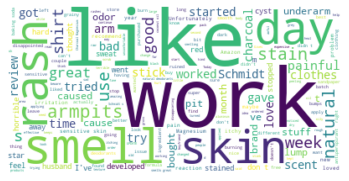

In [74]:
plt.imshow(wordcloudneg, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudnegative.png')